# Problem Description
**URL:**  
https://www.drivendata.org/competitions/66/flu-shot-learning/
**Challenge description:**  
This challenge uses survey data to predict whether individuals receive H1N1 or seasonal flu vaccines. The features include respondents’ social, economic, and demographic backgrounds; their opinions on risk of illness and vaccine effectiveness; and their behaviors toward mitigating transmission. There are both numerical and categorical variables (e.g., race, education, occupation).

**Datapoint definition:**  
Each datapoint is one survey respondent’s full record of demographics, opinions, and behaviors.

**Outcome variable:**  
Binary indicators for whether the respondent was vaccinated or unvaccinated against H1N1 and against seasonal flu.

# Dataset Description
- **Number of examples:** ~26,700  
- **Number of features:** 35  
- I do believe that we may need a feature reduction technique in a supervised ML approach, since there are considerably more examples compared to the features with both together making a incredibly huge dataset. However, overall, the data set has a moderate dataset compared to the size of the data points so, we may be amply sampling the region. 

**How the dataset is provided:**  
The data is provided on thier site and is divided into the following categories: 
- Submission Format
- Training set features.
- Labels for the training set.
- Test set features.

**Stated file size:**  
- The website only provides the link not how big the file is. 

# Data Gathering and processing;

**Downloading the data diretly from the website** 

The data was downloaded directly from the challenge site site:  

In [18]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gffutils
import pyfaidx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm
from sklearn.metrics import *

In [2]:
# Loading the Dataset as a Dataframe
import pandas as pd
df = pd.read_csv('training_set_features.csv')
df_t = pd.read_csv('test_set_features.csv') 
labels = pd.read_csv('training_set_labels.csv')

In [3]:
df_t.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [5]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status

feature_name = "seasonal_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = data[data["seasonal_vaccine"] == 0][feature_name] 
class_2_feat = data[data["seasonal_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

NameError: name 'data' is not defined

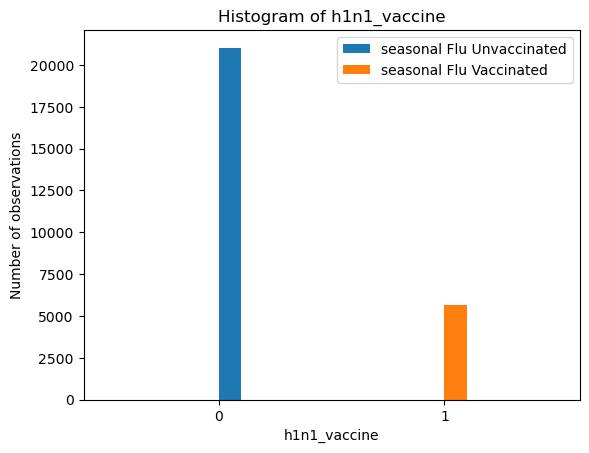

In [6]:
feature_name = "h1n1_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = labels[labels["h1n1_vaccine"] == 0][feature_name] 
class_2_feat = labels[labels["h1n1_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

## Preping the data to take care of missing value: 

In [7]:
# looking the number of NA values in the data set: 
df.isnull().sum()


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
# We can see that there are certain features that have really high number of missing values,
# Since we onle have ~27000 feature, I think dropping any columns that have more than 1000 missing values
# should be dropped, and for the others I will remove those rows. 

na_counts = df.isnull().sum()
cols_d = na_counts[ na_counts > 10000].index.tolist()

df2= df.drop(columns=cols_d)
org_dp = df2.shape[0]
df2

# now removing the rows with na 
df2= df2.dropna()
drop_dp = df2.shape[0]
print (f" {org_dp-drop_dp}, is the numeber for data points that were removed")

# Now we can drop those same rows from the labels dataframe: 
labels2 = labels[labels['respondent_id'].isin(df2['respondent_id'])]


 7065, is the numeber for data points that were removed


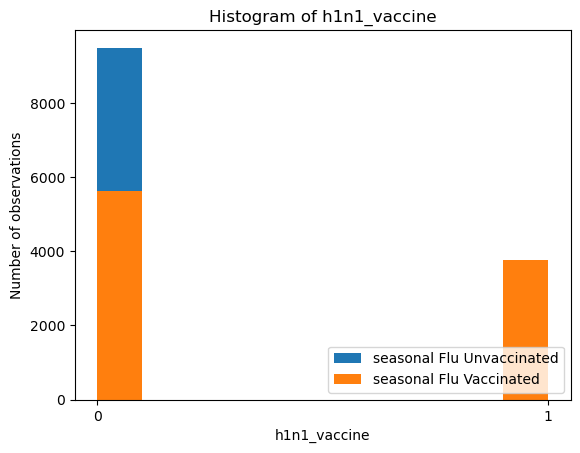

In [9]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status after removing the rows with NA values

# subesting based on outcome: 
class_1_feat = labels2[labels2["seasonal_vaccine"] == 0][feature_name] 
class_2_feat = labels2[labels2["seasonal_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='lower right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

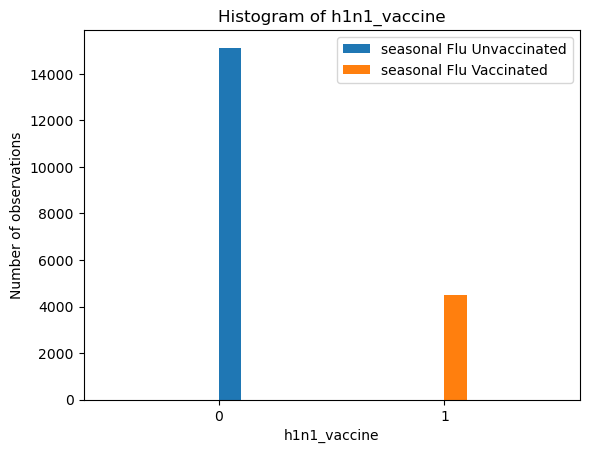

In [10]:
# Plotting a Histogram to show the class distribution of the patients H1N1 Vaccine status after removing the rows with NA values

feature_name = "h1n1_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = labels2[labels2["h1n1_vaccine"] == 0][feature_name] 
class_2_feat = labels2[labels2["h1n1_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

**We can see that the there is not a vast class difference for seasonal flu vaccinated individuals. We will now further analyse the data to look for categorical features and making them numerical.**

In [11]:
# Splitting the Dataframe for categorical features:
categorical = df2.select_dtypes(include=['object','category']).columns.tolist()
df[categorical]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [12]:
# We can see that there are 12 features which are categorical, lets see the categories for each: 
for col in categorical:
    cats = df2[col].dropna().unique()
    print(f"{col}:, {cats} ") 

age_group:, ['55 - 64 Years' '35 - 44 Years' '65+ Years' '45 - 54 Years'
 '18 - 34 Years'] 
education:, ['< 12 Years' '12 Years' 'Some College' 'College Graduate'] 
race:, ['White' 'Black' 'Hispanic' 'Other or Multiple'] 
sex:, ['Female' 'Male'] 
income_poverty:, ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000'] 
marital_status:, ['Not Married' 'Married'] 
rent_or_own:, ['Own' 'Rent'] 
employment_status:, ['Not in Labor Force' 'Employed' 'Unemployed'] 
hhs_geo_region:, ['oxchjgsf' 'bhuqouqj' 'lrircsnp' 'qufhixun' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca'] 
census_msa:, ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City'] 


In [13]:
# making a dictionary for the categorical feturues:
cat_df ={}
for col in categorical:
    cats = df2[col].dropna().unique().tolist()
    cat_df[col]=cats
cat_df

{'age_group': ['55 - 64 Years',
  '35 - 44 Years',
  '65+ Years',
  '45 - 54 Years',
  '18 - 34 Years'],
 'education': ['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
 'race': ['White', 'Black', 'Hispanic', 'Other or Multiple'],
 'sex': ['Female', 'Male'],
 'income_poverty': ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
 'marital_status': ['Not Married', 'Married'],
 'rent_or_own': ['Own', 'Rent'],
 'employment_status': ['Not in Labor Force', 'Employed', 'Unemployed'],
 'hhs_geo_region': ['oxchjgsf',
  'bhuqouqj',
  'lrircsnp',
  'qufhixun',
  'atmpeygn',
  'lzgpxyit',
  'fpwskwrf',
  'mlyzmhmf',
  'dqpwygqj',
  'kbazzjca'],
 'census_msa': ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']}

In [14]:

## Dealing With Missing Values Using SimpleImputer to account for string values
# Imputer being intialized
#imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent', add_indicator=True)

#Imputer being fit to the data and transforming the data back to a data frame
#df2 = pd.DataFrame(imputer.fit_transform(df2), columns=imputer.get_feature_names_out(df2.columns))


# now we will covert these categories to numbers by assigning them number in asscending order for thier respective order in the df above, using it a mapping index, this all is done using the OrdinalEncoder from sklearn
encoders = {}
for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df2[col] = encoder.fit_transform(df2[[col]].astype(str))
    encoders[col] = encoder
df_2= df2.copy()

In [15]:
# Using OneHotEncoder to convert the categorical features to one hot encoding
#encoder = OneHotEncoder(sparse_output=False)# 
# Gotten help from Geek for Geeks to do this, the code is below:
#categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

#one_hot_encoded = encoder.fit_transform(df2[categorical])
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical))

#df_2 = pd.concat([df2, one_hot_df], axis=1)
#
#df_2 = df_2.drop(categorical, axis=1)
#df_2.isnull().sum()
# No improvement in the data set, so we will not use the one hot encoding for the categorical features

In [16]:
# Feature Scaling the data ( only used for Neural Networks and SVM)
# It has been show that it can improve the performance of the model (Geek for Geeks)
#scaler = StandardScaler()
#df2_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# Splitting the data 

### Since the data provided to us has already been split in a test set and training set, I decide to train on the training set by considering it the crossvalidation set

# Begining SVM Model Building

In [66]:

#Joining the Dataframes: 
    # merging the df and labels into one combined data set by matching to the common column and keeping those that match for both data frames
data = df_2.merge(labels2, on='respondent_id', how='inner')
print(data.shape)
X = data.drop(columns=["respondent_id", "seasonal_vaccine"])
y = data["seasonal_vaccine"]

# applying the feature selection to the data set, using the SelectKBest method from sklearn
#  Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#Data_1 = SelectKBest(chi2, k =30).fit_transform(data, data["seasonal_vaccine"])

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# applying PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
data_new = pd.DataFrame(X_pca)
data_new["seasonal_vaccine"] = data["seasonal_vaccine"].values
data_new.columns = data_new.columns.astype(str)
print(data_new.shape)


# Split up dataset into 80% crossvalidation, 20% independent held-out test data
#   Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
df_crossval, df_test, class_crossval, class_test = train_test_split(
    data_new[[c for c in data_new.columns if c != "seasonal_vaccine"]], 
    data_new["seasonal_vaccine"], 
    test_size=0.20,
    stratify=data_new["seasonal_vaccine"],
    random_state=42  # sets seed to make the selection reproducible
)

# manually creating the class and dataframe sepration for the crossvalidation set 
#df_crossval = df_2.copy()
#class_crossval = labels["seasonal_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index


df_crossval.reset_index(inplace = True)
class_crossval = class_crossval.reset_index()
# Check output to ensure split is as intended
df_crossval.shape, df_test.shape, class_crossval.shape, class_test.shape
pct_unvaccinated_in_dataset = (data_new[data_new["seasonal_vaccine"] == 0]["seasonal_vaccine"].shape[0])/data_new.shape[0]
pct_unvacinated_in_crossval_set = (class_crossval["seasonal_vaccine"] == 0).mean()
print(pct_unvaccinated_in_dataset)
print(pct_unvacinated_in_crossval_set)

# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval["seasonal_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")
    
# Applying Logistic Regression to the data
model_lr = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
#model_lr = svm.LinearSVC(penalty='l2', C=1, random_state=42)
#model_lr= SGDClassifier(loss='modified_huber',penalty = "l1", max_iter=10000, random_state=42)
#model_lr = svm.SVC(kernel='poly', C=1, random_state=42) 
#model_lr = GradientBoostingClassifier(n_estimators=1000, learning_rate= 0.13, max_depth=3, random_state=42, max_leaf_nodes=27)
#model_lr =RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42) 
#model_lr= HistGradientBoostingClassifier(max_iter=6150, random_state=42,learning_rate= 0.13, l2_regularization=0.19, max_depth=3, max_leaf_nodes=27, early_stopping=True)
#model_lr = MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=100, random_state=42)

scores = cross_validate(model_lr, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)
#scores= selector.fit(df_crossval, class_crossval["seasonal_vaccine"])

(19642, 35)
(19642, 16)
0.5220445983097445
0.5220518042385286
train : [6562 6008] | test : [1641 1502]
train : [6562 6008] | test : [1641 1502]
train : [6562 6008] | test : [1641 1502]
train : [6563 6008] | test : [1640 1502]
train : [6563 6008] | test : [1640 1502]


Looking at the performance and accuracy of the the model with ordinal enocode, testing with one hot encoding showed worst accuracy. Moving to do feature selection to improve model accuracy.
Looking RFEC feature reduction, which performs the feature reduction in conjugtion with the cross validation. 

In [71]:
# Applying SVM Classifier 
#clf = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier

#scores = cross_validate(clf, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    #scoring=('accuracy', 'precision'),
    #return_train_score=True)
# No heading for the columns, weird
data_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,seasonal_vaccine
0,-4.263569,-2.341407,0.834500,-3.073439,-2.312288,-1.582823,-0.271518,-0.147341,0.207914,-0.638221,0.254341,-0.575097,0.780074,-0.402595,0.036205,0
1,-3.151146,2.466231,0.919554,-1.918392,-1.074235,0.553309,-0.897827,0.002567,1.953244,-0.423383,0.568557,-0.585905,0.312175,0.314107,0.808140,1
2,-2.167606,1.791334,0.214770,-0.237650,-1.516348,-0.484212,-0.766845,-2.563794,-1.246028,0.373821,-0.943290,-1.628348,-0.589647,0.673518,-0.646151,1
3,-1.246551,-0.398215,2.211236,-0.566880,0.192048,-0.130908,0.505246,0.296529,1.734834,-0.629812,0.718295,0.743864,-0.811773,0.455568,0.123869,0
4,-0.241574,1.364322,-0.014541,0.552176,-0.056733,0.427550,0.594737,3.645420,-0.945893,-0.053046,0.591201,-0.265994,0.277828,1.713272,0.619497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,0.939891,3.247021,0.435631,-3.110594,-0.328290,1.278729,0.571502,0.143730,-0.926071,0.072953,-0.191676,0.249182,-0.098775,1.438711,0.359996,1
19638,1.797209,0.669367,2.548297,0.423443,1.353007,1.909640,0.485961,-0.486878,0.283251,-0.168637,-0.573438,1.280873,-0.154420,1.214204,-0.300579,0
19639,-1.330743,-1.674634,-0.209296,-0.333237,-1.473379,0.548682,0.740906,-0.023377,-0.341391,-0.045526,1.043019,-0.179731,-1.203569,-0.714505,0.599875,0
19640,0.623213,-1.735668,0.374076,1.904459,0.415442,1.611763,-0.387353,-1.052664,0.822990,0.136134,-0.456926,-0.387448,-0.793939,0.509855,-0.359393,0


In [68]:
data
# Examine results
scores

#Nicer printing of specific performance metrics across partitions
scores_train_acc = scores["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

75.85%, 75.78%, 76.15%, 75.76%, 75.64%
75.53%, 75.91%, 74.2%, 76.0%, 76.51%


In [69]:
# Prepare for final model training and evaluation
df_crossval = df_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval = class_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [70]:
#clf_final = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier

#final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [ ]:
# updataed the final model to use HistGradientBoostingClassifier ( I had forgotten to update this), Idiota
#clf_final = selector # use the same model as above
clf_final= model_lr
  # define classifier
final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [ ]:
# Before we do predictions on the Test Set, we need to do the same preprocessing steps as above, 
# Now removing any rows with NA values: 
#df_t2=df_t.copy()
# Imputer being fit to the data and transforming the data back to a data frame
#df_t2 = pd.DataFrame(imputer.transform(df_t2), columns=imputer.get_feature_names_out(df_t2.columns))
# Make sure to retain the original indexs just in case we need to refer back to the original data
#df_t2.index = df_t.index

# Now mapping the categorical features to numbers 
#for col in cat_df: 
    #encoder = OrdinalEncoder(categories=[cat_df[col]])
    #df_t2[col] = encoder.fit_transform(df_t2[[col]])
#df_t2.head()

# Feature Sclaling ( Only used for the Nueral Network and SVM models)
# Shown to improve the performance of the models as feturues with large variation can dominate the model  (Geekfor Geeks)
#df_t2 = scaler.transform(df_t2) 

# One Hot Encoding the categorical features for the test set: 
#one_hot_encoded2 = encoder.fit_transform(df_t2[categorical_columns])
#one_hot_df2 = pd.DataFrame(one_hot_encoded2, columns=encoder.get_feature_names_out(categorical_columns))

#df_t2 = pd.concat([df_t2, one_hot_df2], axis=1)

#df_t2 = df_t2.drop(categorical_columns, axis=1)
#df_t2.head()

In [ ]:
#pred_train_proba = final_model.predict_proba(df_crossval)[:, 1] # predict class labels probability for the training set
#pred_test_proba = final_model.predict_proba(df_test)[:, 1]  # probability of class 1 # predict class label probabiltiies for the independent test set
pred_train = final_model.predict(df_crossval) # predict class labels for the training set
pred_test = final_model.predict(df_test) # predict class labels for the independent test set


In [ ]:
# Evaluate final model performance

accuracy_score(pred_train, class_crossval["seasonal_vaccine"].values)  # training accuracy



0.9988544517278687

In [ ]:
accuracy_score(pred_test, class_test)       # testing accuracy

0.998727411555103

In [ ]:
confusion_matrix(class_crossval, pred_train)


array([[8188,   15],
       [   3, 7507]])

In [ ]:
confusion_matrix(class_test, pred_test)

array([[2047,    4],
       [   1, 1877]])

# Repeat the modeling for H1N1 


In [ ]:
# manually creating the class and dataframe sepration for the crossvalidation set 
df_crossval2 = df2.copy()
class_crossval2 = labels["h1n1_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index
df_crossval2.reset_index(inplace = True)
class_crossval2 = class_crossval2.reset_index()

In [139]:
# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval2["h1n1_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval2, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")

ValueError: Found input variables with inconsistent numbers of samples: [19642, 26707]

In [26]:
# Applying Logistic Regression to the data
#model_lr2 = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

scores2 = cross_validate(model_lr, df_crossval2, class_crossval2["h1n1_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 538, in fit
    X, known_categories = self._preprocess_X(X, reset=True)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 274, in _preprocess_X
    X = validate_data(self, X, **check_X_kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '65+ Years'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 538, in fit
    X, known_categories = self._preprocess_X(X, reset=True)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 274, in _preprocess_X
    X = validate_data(self, X, **check_X_kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '55 - 64 Years'


In [ ]:
# Examine results
scores2

# Nicer printing of specific performance metrics across partitions
scores_train_acc = scores2["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores2["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

87.58%, 87.04%, 87.85%, 87.45%, 87.59%
85.51%, 85.38%, 85.6%, 86.18%, 84.87%


In [ ]:
# Prepare for final model training and evaluation
df_crossval2 = df_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval2 = class_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [ ]:
#clf_final = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
  # define classifier

final_model2 = clf_final.fit(df_crossval2, class_crossval2['h1n1_vaccine']) # train model


In [ ]:
pred_train_proba2 = final_model2.predict_proba(df_crossval2)[:, 1] # predict class labels for the training set
pred_train2 = final_model.predict(df_crossval2) # predict class labels for the training set, only used for the evaluation of the model
pred_test_proba2 = final_model2.predict_proba(df_t2)[:, 1] # predict class labels for the independent test set


In [ ]:
# Evaluate final model performance

accuracy_score(pred_train2, class_crossval2) # accuracy in training
#accuracy_score(pred_test, class_test) # accuracy in testing


0.8766615494065226

In [ ]:
confusion_matrix(pred_train2, class_crossval2) # confusion matrix in training
#confusion_matrix(pred_test, class_test) # confusion matrix in testing

array([[20217,  2478],
       [  816,  3196]])

### Since We don't get Class_test (Ground Truth for the test set), we will just output the predicted_test values in a csv. 


In [ ]:
pred_test_df = pd.DataFrame()
test_id= df_t['respondent_id']
pred_test_df['respondent_id'] = test_id
pred_test_df['h1n1_vaccine']= pred_test_proba2.astype(float)
pred_test_df['seasonal_vaccine'] = pred_test_proba.astype(float)
pred_test_df
pred_test_df.to_csv('predictions_HGBC_Ord_Impu_Fixed.csv', index=False)
